#Project: Evaluating Design Alternatives


Saving CMAPSSData.zip to CMAPSSData (1).zip
Data loaded successfully!

Training Dataset Exploration:
Shape: (24720, 24)

First 5 rows:
     unit_number  time_cycles  op_setting_1  op_setting_2  op_setting_3  \
1 1      -0.0005       0.0004         100.0        518.67        642.36   
  2       0.0008      -0.0003         100.0        518.67        642.50   
  3      -0.0014      -0.0002         100.0        518.67        642.18   
  4      -0.0020       0.0001         100.0        518.67        642.92   
  5       0.0016       0.0000         100.0        518.67        641.68   

     sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_10  \
1 1   1583.23   1396.84     14.62     21.61    553.97  ...     522.31   
  2   1584.69   1396.89     14.62     21.61    554.55  ...     522.42   
  3   1582.35   1405.61     14.62     21.61    554.43  ...     522.03   
  4   1585.61   1392.27     14.62     21.61    555.21  ...     522.49   
  5   1588.63   1397.65     14.62     21.61    55

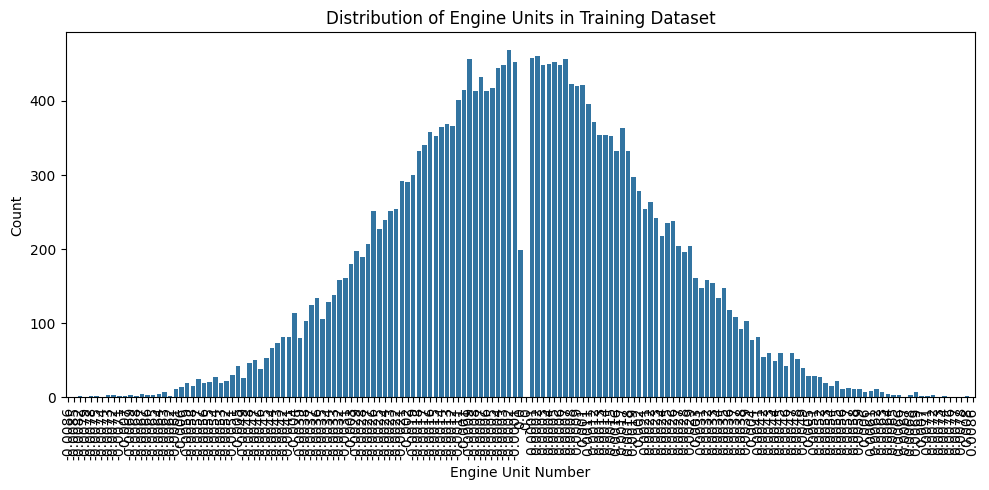

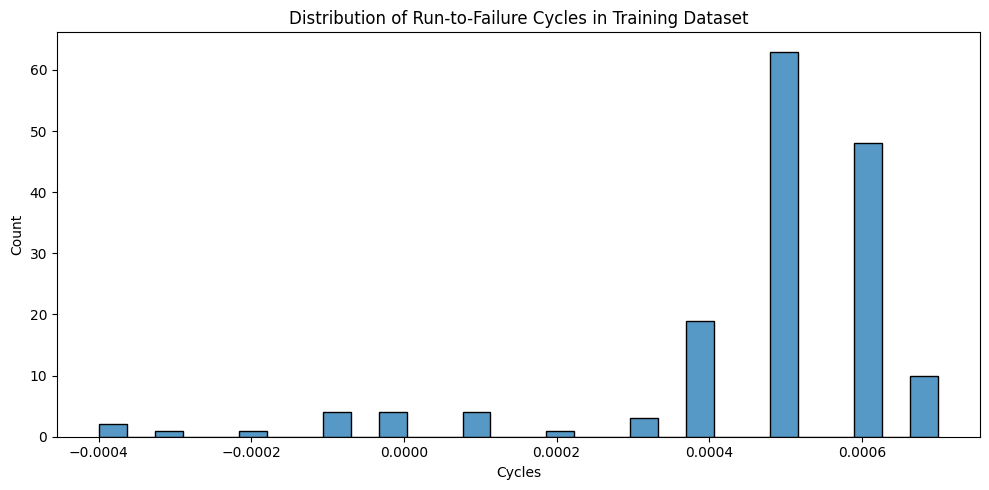

Data preprocessing and feature engineering completed!

Processed training data:
   unit_number  time_cycles  op_setting_1  op_setting_2  op_setting_3  \
0      -0.0005       0.0004           0.0           0.0      0.355972   
1       0.0008      -0.0003           0.0           0.0      0.388759   
2      -0.0014      -0.0002           0.0           0.0      0.313817   
3      -0.0020       0.0001           0.0           0.0      0.487119   
4       0.0016       0.0000           0.0           0.0      0.196721   

   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  ...  \
0  0.370523  0.308580       0.0       1.0  0.208812  ...   
1  0.399100  0.309360       0.0       1.0  0.236590  ...   
2  0.353298  0.445398       0.0       1.0  0.230843  ...   
3  0.417107  0.237285       0.0       1.0  0.268199  ...   
4  0.476218  0.321217       0.0       1.0  0.245690  ...   

   sensor_17_moving_avg_15  sensor_18_moving_avg_15  sensor_19_moving_avg_15  \
0                      0.0              

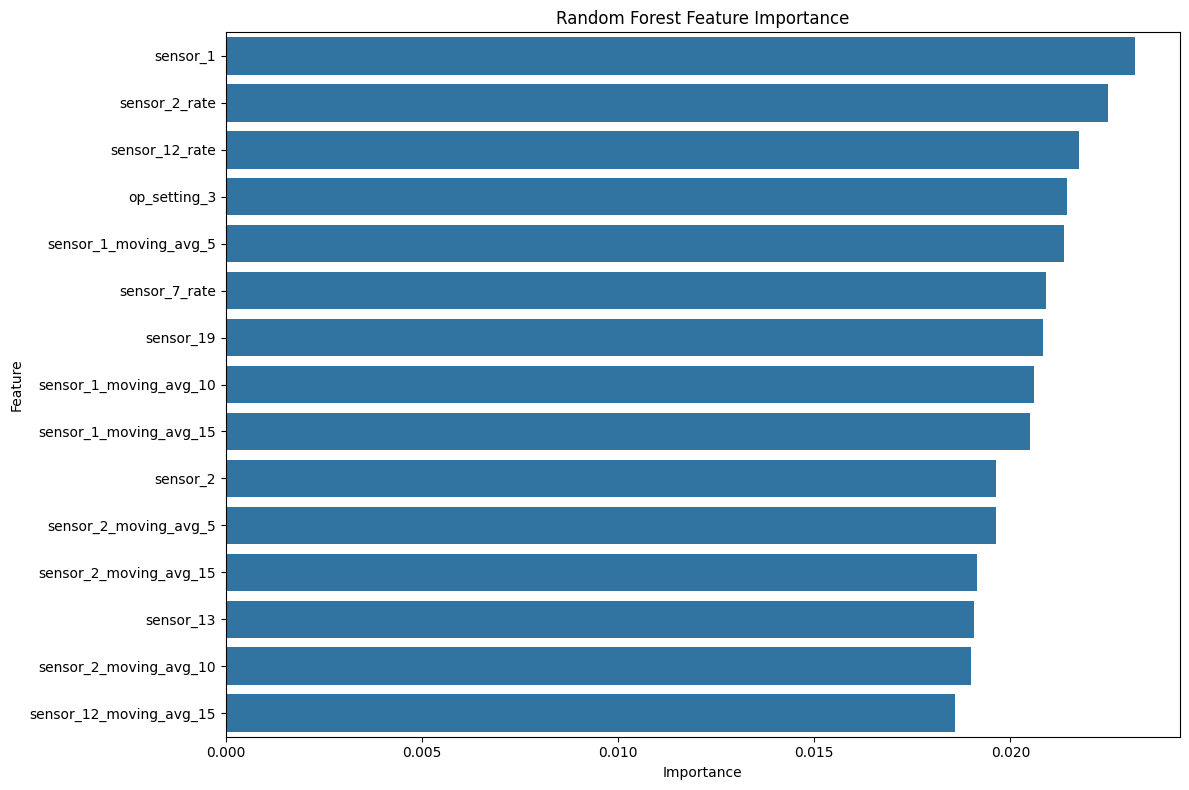

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM model...
Epoch 1/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - loss: 7.3456e-05 - val_loss: 9.1733e-08
Epoch 2/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 1.1801e-07 - val_loss: 9.1520e-08
Epoch 3/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 1.0031e-07 - val_loss: 9.1500e-08
Epoch 4/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - loss: 9.6165e-08 - val_loss: 8.9753e-08
Epoch 5/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - loss: 9.3029e-08 - val_loss: 8.9682e-08
Epoch 6/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 9.5042e-08 - val_loss: 8.9712e-08
Epoch 7/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - loss: 9.4325e-08 - val_loss: 9.8631e-08
Epoch 8/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - loss: 9.6006e-08 - val_loss: 9.1886e-08
Epoch 9/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - loss: 9.5829e-08 - val_loss: 9.9558e-08
Epoch 10/50
426/426 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 9.6041e-08 - val_loss: 9.0122e-08
Epoch 11/50
426/

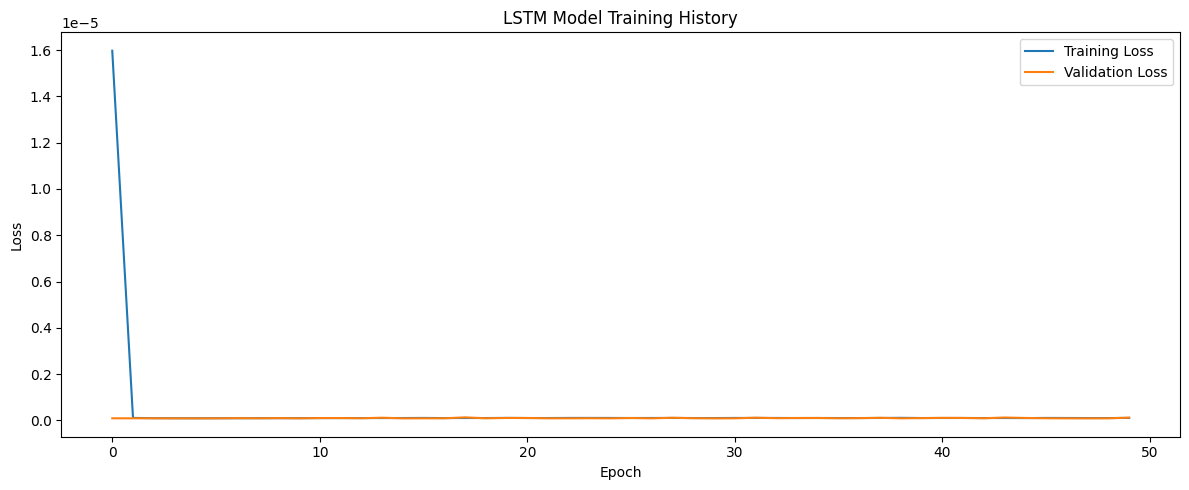


Model Comparison:
           Model      RMSE  R² Score
0  Random Forest  0.000305 -0.020723
1           LSTM  0.000345 -0.337678


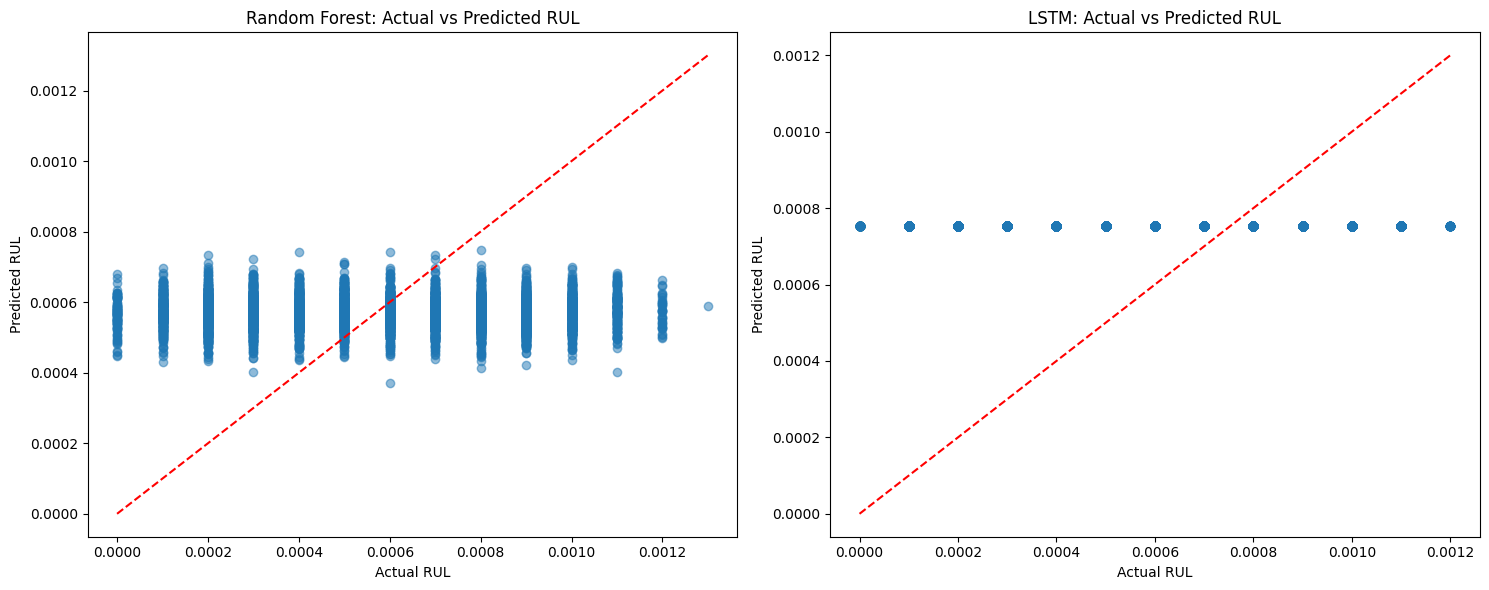

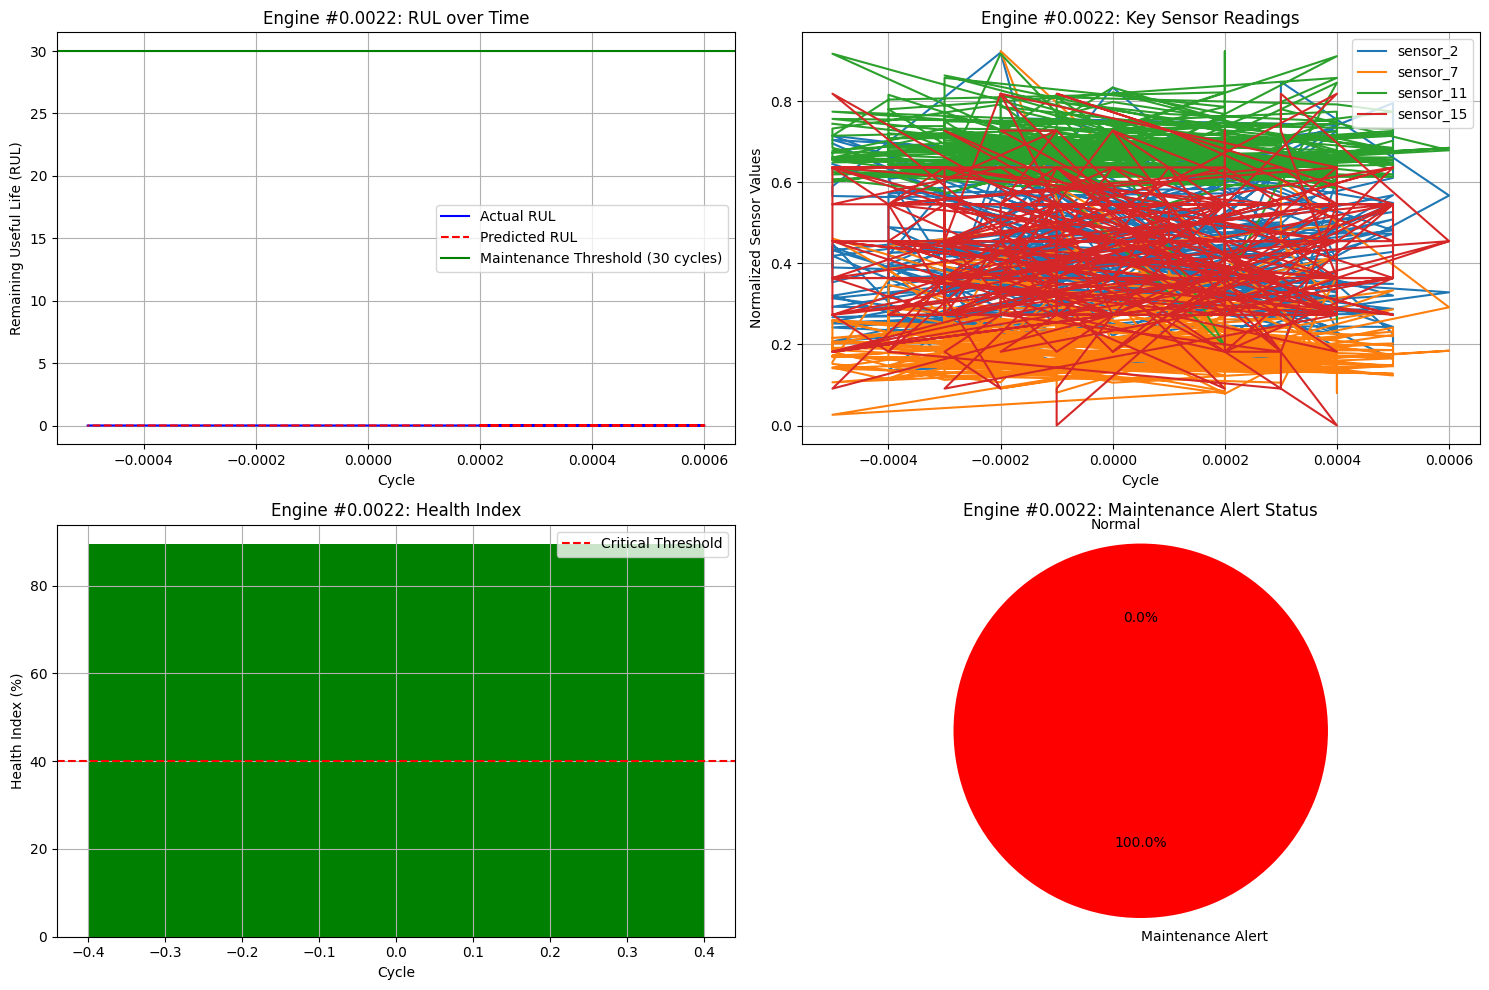


=== MAINTENANCE RECOMMENDATION ===
Engine Unit: #0.0022
Current Cycle: -0.0005
Predicted Remaining Useful Life: 0.0 cycles
STATUS: MAINTENANCE REQUIRED
Recommendation: Schedule maintenance within the next 1 cycles


In [ ]:
# Jet Engine Health Maintenance System
# Using NASA Turbofan Engine Degradation Simulation Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from google.colab import files
import io
import zipfile
import os

# Mount Google Drive for saving models (optional)
# from google.colab import drive
# drive.mount('/content/drive')

#=====================================================================
# 1. DATA LOADING AND EXPLORATION
#=====================================================================

# Option 1: If you've uploaded the data to Colab directly
uploaded = files.upload()  # This will prompt you to upload files

# Option 2: If using Kaggle API to download the data
# !pip install kaggle
# from google.colab import files
# files.upload()  # Upload kaggle.json
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d behrad3d/nasa-cmaps

# Assuming the data is now available as a zip file
# Extract all files from the uploaded zip
for fn in uploaded.keys():
    if fn.endswith('.zip'):
        zip_ref = zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r')
        zip_ref.extractall('.')
        zip_ref.close()

# Function to load and process data
def load_data(filename):
    """
    Load the NASA turbofan engine data with proper column names
    """
    # Define column names based on NASA documentation
    # Adjust these based on your specific dataset
    columns = ['unit_number', 'time_cycles']
    # Operational settings
    columns += [f'op_setting_{i+1}' for i in range(3)]
    # Sensor readings
    columns += [f'sensor_{i+1}' for i in range(21)]

    # Load data
    data = pd.read_csv(filename, sep=' ', header=None, names=columns)

    # Remove NaN columns that may appear due to extra spaces in the text file
    data = data.dropna(axis=1, how='all')

    return data

# Load the training data
# Adjust filenames according to your dataset structure
try:
    train_df = load_data('train_FD003.txt')
    test_df = load_data('test_FD003.txt')
    rul_df = pd.read_csv('RUL_FD003.txt', header=None, names=['RUL'])
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error loading data: {e}")
    print("Please check file paths and try again.")

#=====================================================================
# 2. DATA EXPLORATION
#=====================================================================

def explore_data(df, title="Dataset"):
    """
    Perform basic exploration of the dataset
    """
    print(f"\n{title} Exploration:")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nDataset info:")
    print(df.info())
    print("\nSummary statistics:")
    print(df.describe())

    # Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print("\nMissing values:")
        print(missing[missing > 0])
    else:
        print("\nNo missing values found.")

    # Plot distribution of engine units
    plt.figure(figsize=(10, 5))
    sns.countplot(x='unit_number', data=df)
    plt.title(f'Distribution of Engine Units in {title}')
    plt.xlabel('Engine Unit Number')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Plot cycles distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df.groupby('unit_number')['time_cycles'].max(), bins=30)
    plt.title(f'Distribution of Run-to-Failure Cycles in {title}')
    plt.xlabel('Cycles')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Run exploration on training data
try:
    explore_data(train_df, "Training Dataset")
except Exception as e:
    print(f"Error during exploration: {e}")

#=====================================================================
# 3. DATA PREPROCESSING AND FEATURE ENGINEERING
#=====================================================================

def add_rul(df):
    """
    Add Remaining Useful Life (RUL) column to the dataframe
    """
    # Get the maximum cycle for each engine
    max_cycles = df.groupby('unit_number')['time_cycles'].max().reset_index()
    max_cycles.columns = ['unit_number', 'max_cycles']

    # Merge with the original dataframe
    df = df.merge(max_cycles, on='unit_number', how='left')

    # Calculate RUL
    df['RUL'] = df['max_cycles'] - df['time_cycles']

    # Drop the helper column
    df = df.drop('max_cycles', axis=1)

    return df

def feature_engineering(df):
    """
    Create additional features that might be useful for predicting RUL
    """
    # Create a copy to avoid modifying the original
    df_features = df.copy()

    # Calculate moving averages for sensor readings
    window_sizes = [5, 10, 15]

    for window in window_sizes:
        for sensor in range(1, 22):
            col = f'sensor_{sensor}'
            if col in df_features.columns:
                df_features[f'{col}_moving_avg_{window}'] = df_features.groupby('unit_number')[col].transform(
                    lambda x: x.rolling(window=window, min_periods=1).mean())

    # Calculate rates of change for key sensors
    key_sensors = [2, 3, 4, 7, 11, 12, 15]  # Example key sensors, adjust based on your analysis

    for sensor in key_sensors:
        col = f'sensor_{sensor}'
        if col in df_features.columns:
            df_features[f'{col}_rate'] = df_features.groupby('unit_number')[col].transform(
                lambda x: x.diff().fillna(0))

    return df_features

def normalize_data(train_df, test_df=None):
    """
    Normalize the sensor readings and operational settings
    """
    # Identify columns to normalize (sensor readings and operational settings)
    sensor_cols = [col for col in train_df.columns if col.startswith('sensor_')]
    op_cols = [col for col in train_df.columns if col.startswith('op_setting_')]
    cols_to_normalize = sensor_cols + op_cols

    # Initialize scaler
    scaler = MinMaxScaler()

    # Fit and transform training data
    train_df[cols_to_normalize] = scaler.fit_transform(train_df[cols_to_normalize])

    # Transform test data if provided
    if test_df is not None:
        # Ensure test_df has the same columns
        common_cols = list(set(cols_to_normalize).intersection(set(test_df.columns)))
        test_df[common_cols] = scaler.transform(test_df[common_cols])
        return train_df, test_df, scaler

    return train_df, scaler

def prepare_data_for_modeling(df, sequence_length=30):
    """
    Prepare data for sequence-based models by creating sequences of data
    """
    features = df.drop(['unit_number', 'time_cycles', 'RUL'], axis=1).columns

    X = []
    y = []

    # Group by engine unit
    for unit in df['unit_number'].unique():
        unit_data = df[df['unit_number'] == unit]

        # Create sequences for this engine
        for i in range(len(unit_data) - sequence_length + 1):
            X.append(unit_data[features].iloc[i:i+sequence_length].values)
            y.append(unit_data['RUL'].iloc[i+sequence_length-1])

    return np.array(X), np.array(y)

# Process the training data
try:
    # Add RUL to training data
    train_df = add_rul(train_df)

    # Feature engineering
    train_df = feature_engineering(train_df)

    # Normalize the data
    train_df, scaler = normalize_data(train_df)

    print("Data preprocessing and feature engineering completed!")

    # Display the first few rows of the processed data
    print("\nProcessed training data:")
    print(train_df.head())

except Exception as e:
    print(f"Error during data preprocessing: {e}")

#=====================================================================
# 4. MODEL 1: RANDOM FOREST REGRESSOR
#=====================================================================

def train_random_forest(df, test_size=0.2, random_state=42):
    """
    Train a Random Forest Regressor model for RUL prediction
    """
    # Drop non-feature columns
    features = df.drop(['unit_number', 'time_cycles', 'RUL'], axis=1).columns
    X = df[features]
    y = df['RUL']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train model
    print("Training Random Forest model...")
    rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Evaluate model
    y_pred = rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Random Forest Model RMSE: {rmse:.4f}")
    print(f"Random Forest Model R² Score: {r2:.4f}")

    # Feature importance visualization
    plt.figure(figsize=(12, 8))
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Random Forest Feature Importance')
    plt.tight_layout()
    plt.show()

    return rf_model, X_test, y_test, y_pred

#=====================================================================
# 5. MODEL 2: LSTM NEURAL NETWORK
#=====================================================================

def train_lstm_model(X, y, test_size=0.2, random_state=42):
    """
    Train an LSTM model for RUL prediction
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Get the input shape
    input_shape = (X_train.shape[1], X_train.shape[2])

    # Initialize model
    model = Sequential([
        LSTM(64, activation='relu', input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mse')

    # Train model
    print("Training LSTM model...")
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Evaluate model
    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"LSTM Model RMSE: {rmse:.4f}")
    print(f"LSTM Model R² Score: {r2:.4f}")

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('LSTM Model Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model, X_test, y_test, y_pred

#=====================================================================
# 6. MODEL COMPARISON AND EVALUATION
#=====================================================================

def compare_models(rf_results, lstm_results):
    """
    Compare the performance of the two models
    """
    _, X_test_rf, y_test_rf, y_pred_rf = rf_results
    _, X_test_lstm, y_test_lstm, y_pred_lstm = lstm_results

    # Calculate metrics
    rf_rmse = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
    rf_r2 = r2_score(y_test_rf, y_pred_rf)

    lstm_rmse = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
    lstm_r2 = r2_score(y_test_lstm, y_pred_lstm)

    # Create a comparison dataframe
    comparison = pd.DataFrame({
        'Model': ['Random Forest', 'LSTM'],
        'RMSE': [rf_rmse, lstm_rmse],
        'R² Score': [rf_r2, lstm_r2]
    })

    print("\nModel Comparison:")
    print(comparison)

    # Visualize predictions vs actual
    plt.figure(figsize=(15, 6))

    # Random Forest Plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_test_rf, y_pred_rf, alpha=0.5)
    plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'r--')
    plt.title('Random Forest: Actual vs Predicted RUL')
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')

    # LSTM Plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test_lstm, y_pred_lstm, alpha=0.5)
    plt.plot([y_test_lstm.min(), y_test_lstm.max()], [y_test_lstm.min(), y_test_lstm.max()], 'r--')
    plt.title('LSTM: Actual vs Predicted RUL')
    plt.xlabel('Actual RUL')
    plt.ylabel('Predicted RUL')

    plt.tight_layout()
    plt.show()

    return comparison

#=====================================================================
# 7. HEALTH MONITORING DASHBOARD (SAMPLE VISUALIZATION)
#=====================================================================

def create_health_dashboard(df, model, scaler, threshold=30):
    """
    Create a sample health monitoring dashboard for engines
    """
    # Select a random engine for demonstration
    engine_units = df['unit_number'].unique()
    sample_engine = np.random.choice(engine_units)

    # Get data for the selected engine
    engine_data = df[df['unit_number'] == sample_engine].copy()

    # Prepare features for prediction
    features = engine_data.drop(['unit_number', 'time_cycles', 'RUL'], axis=1).columns
    X = engine_data[features]

    # Make predictions
    engine_data['Predicted_RUL'] = model.predict(X)

    # Create dashboard visualizations
    plt.figure(figsize=(15, 10))

    # Plot 1: RUL over time
    plt.subplot(2, 2, 1)
    plt.plot(engine_data['time_cycles'], engine_data['RUL'], 'b-', label='Actual RUL')
    plt.plot(engine_data['time_cycles'], engine_data['Predicted_RUL'], 'r--', label='Predicted RUL')
    plt.axhline(y=threshold, color='g', linestyle='-', label=f'Maintenance Threshold ({threshold} cycles)')
    plt.title(f'Engine #{sample_engine}: RUL over Time')
    plt.xlabel('Cycle')
    plt.ylabel('Remaining Useful Life (RUL)')
    plt.legend()
    plt.grid(True)

    # Plot 2: Key sensor readings
    plt.subplot(2, 2, 2)
    key_sensors = ['sensor_2', 'sensor_7', 'sensor_11', 'sensor_15']
    for sensor in key_sensors:
        if sensor in engine_data.columns:
            plt.plot(engine_data['time_cycles'], engine_data[sensor], label=sensor)
    plt.title(f'Engine #{sample_engine}: Key Sensor Readings')
    plt.xlabel('Cycle')
    plt.ylabel('Normalized Sensor Values')
    plt.legend()
    plt.grid(True)

    # Plot 3: Health Index
    plt.subplot(2, 2, 3)
    max_rul = engine_data['RUL'].max()
    engine_data['Health_Index'] = (engine_data['Predicted_RUL'] / max_rul) * 100

    colors = []
    for idx in engine_data['Health_Index']:
        if idx >= 70:
            colors.append('green')
        elif idx >= 40:
            colors.append('yellow')
        else:
            colors.append('red')

    plt.bar(engine_data['time_cycles'], engine_data['Health_Index'], color=colors)
    plt.title(f'Engine #{sample_engine}: Health Index')
    plt.xlabel('Cycle')
    plt.ylabel('Health Index (%)')
    plt.axhline(y=40, color='r', linestyle='--', label='Critical Threshold')
    plt.legend()
    plt.grid(True)

    # Plot 4: Maintenance Alert Status
    plt.subplot(2, 2, 4)
    engine_data['Alert'] = engine_data['Predicted_RUL'] <= threshold
    alert_counts = engine_data['Alert'].value_counts()

    plt.pie([alert_counts.get(False, 0), alert_counts.get(True, 0)],
            labels=['Normal', 'Maintenance Alert'],
            colors=['green', 'red'],
            autopct='%1.1f%%',
            startangle=90)
    plt.title(f'Engine #{sample_engine}: Maintenance Alert Status')
    plt.axis('equal')

    plt.tight_layout()
    plt.show()

    # Print maintenance recommendations
    last_rul = engine_data['Predicted_RUL'].iloc[-1]
    print("\n=== MAINTENANCE RECOMMENDATION ===")
    print(f"Engine Unit: #{sample_engine}")
    print(f"Current Cycle: {engine_data['time_cycles'].iloc[-1]}")
    print(f"Predicted Remaining Useful Life: {last_rul:.1f} cycles")

    if last_rul <= threshold:
        print("STATUS: MAINTENANCE REQUIRED")
        print(f"Recommendation: Schedule maintenance within the next {max(1, int(last_rul))} cycles")
    else:
        print("STATUS: NORMAL OPERATION")
        print(f"Recommendation: Schedule routine inspection in {int(last_rul - threshold)} cycles")

#=====================================================================
# 8. MAIN EXECUTION
#=====================================================================

def main():
    """
    Main execution function
    """
    print("========== JET ENGINE HEALTH MAINTENANCE SYSTEM ==========")
    print("Starting data processing and model training...\n")

    # Process the training data
    try:
        # Add RUL to training data
        processed_df = add_rul(train_df)

        # Feature engineering
        processed_df = feature_engineering(processed_df)

        # Normalize the data
        processed_df, scaler = normalize_data(processed_df)

        print("Data preprocessing and feature engineering completed!")

        # Train Random Forest model
        rf_results = train_random_forest(processed_df)

        # Prepare sequence data for LSTM
        X_seq, y_seq = prepare_data_for_modeling(processed_df)

        # Train LSTM model
        lstm_results = train_lstm_model(X_seq, y_seq)

        # Compare models
        model_comparison = compare_models(rf_results, lstm_results)

        # Select the best model for the dashboard
        # In a real application, you'd select based on performance metrics
        best_model = rf_results[0]  # Using Random Forest for simplicity

        # Create a health monitoring dashboard
        create_health_dashboard(processed_df, best_model, scaler)

    except Exception as e:
        print(f"Error in main execution: {e}")

# Run the main function
if __name__ == "__main__":
    main()